# Ciência dos Dados - Projeto 3

#### Bruno Bitelli e Leonardo Andrade, 2° B
_____

## Introdução: 

Neste trabalho será realizada uma análise de regressão múltipla. Como variável resposta foi escolhida a taxa mortalidade de diferentes países, e como variáveis explicativas a fertilidade e o gasto governamental per capita com saúde de cada um deles. Realizaremos uma análise descritiva dos dados obtidos via Gapminder, com o intuito de responder a seguinte pergunta:

       Como a taxa de fertilidade de uma população e os seus gastos com saúde podem explicar a taxa de mortalidade infantil    de um país?

#### Atenção:

Todas as variáveis da base de dados estão em logarítimo natural.

## Construção da base de dados:

In [1]:
from IPython.display import Image
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np
import statsmodels.api as sm1
import statsmodels.formula.api as sm
%matplotlib inline

In [2]:
dados_mortalidade_infantil = pd.read_excel("under5mortality.xlsx", index_col = 0)
dados_gastos_governo = pd.read_excel("indicator_per-capita-government-expenditure-on-health-at-average-exchange-rate-us.xlsx", index_col = 0)
dados_fertilidade = pd.read_excel("total_fertility.xlsx", index_col = 0)

In [3]:
mortalidade_infantil = dados_mortalidade_infantil.iloc[:,216:217]

In [4]:
mortalidade_infantil.head()

,mortalidade_infantil_2010
Under five mortality,
Abkhazia,NaN
Afghanistan,2.021189
Akrotiri and Dhekelia,NaN
Albania,2.809403
Algeria,3.310543


In [5]:
gastos_governo = dados_gastos_governo.iloc[:, 16:17]

In [6]:
gastos_governo.head()

,gastos_governo_2010
Per capita government expenditure on health at average exchange rate (US$),
Abkhazia,NaN
Afghanistan,1.479422
Akrotiri and Dhekelia,NaN
Albania,4.543546
Algeria,4.933329


In [7]:
fertilidade = dados_fertilidade.iloc[:,216:217]

In [8]:
fertilidade.head()

,fertilidade_2010
Total fertility rate,
Abkhazia,NaN
Afghanistan,1.733424
Akrotiri and Dhekelia,NaN
Albania,0.553885
Algeria,1.036737


In [9]:
dados = mortalidade_infantil.join(gastos_governo, how='outer')
dados = dados.join(fertilidade, how='outer')

In [10]:
dados = dados[~np.isnan(dados.mortalidade_infantil_2010)]
dados = dados[~np.isnan(dados.gastos_governo_2010)]
dados = dados[~np.isnan(dados.fertilidade_2010)]
dados.head()

,mortalidade_infantil_2010,gastos_governo_2010,fertilidade_2010
Afghanistan,2.021189,1.479422,1.733424
Albania,2.809403,4.543546,0.553885
Algeria,3.310543,4.933329,1.036737
Angola,5.206750,4.620960,1.827770
Antigua and Barbuda,2.292535,6.193294,0.756122


In [11]:
dados.tail()

,mortalidade_infantil_2010,gastos_governo_2010,fertilidade_2010
Vanuatu,3.349904,4.959797,1.252763
Venezuela,2.809403,5.444660,0.904218
Vietnam,3.210844,3.445529,0.598837
Yemen,4.074142,2.725867,1.504077
Zambia,4.440296,3.782644,1.759581


In [12]:
dados.shape

(176, 3)

## Análise descritiva

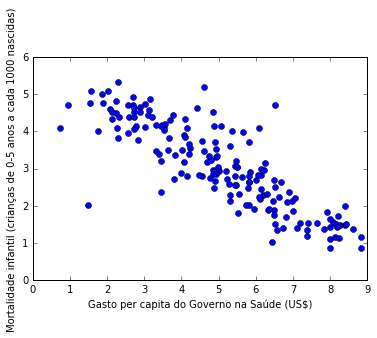

In [13]:
# Plotando os gráficos de dispersão.
plt.plot(dados.gastos_governo_2010,dados.mortalidade_infantil_2010,'o')
plt.xlabel('Gasto per capita do Governo na Saúde (US$)')
plt.ylabel("Mortalidade infantil (crianças de 0-5 anos a cada 1000 nascidas)")

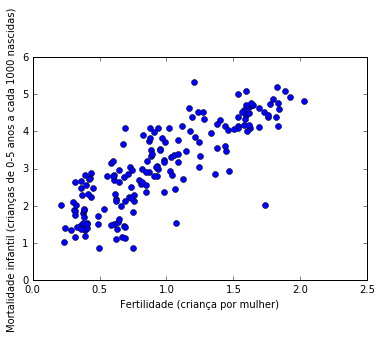

In [14]:
plt.plot(dados.fertilidade_2010,dados.mortalidade_infantil_2010,'o')
plt.xlabel("Fertilidade (criança por mulher)")
plt.ylabel("Mortalidade infantil (crianças de 0-5 anos a cada 1000 nascidas)")

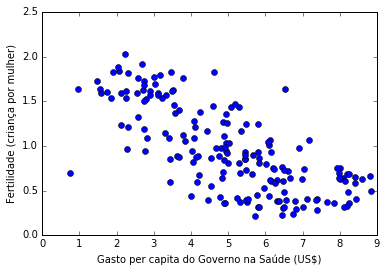

In [15]:
plt.plot(dados.gastos_governo_2010,dados.fertilidade_2010,'o')
plt.xlabel('Gasto per capita do Governo na Saúde (US$)')
plt.ylabel("Fertilidade (criança por mulher)")

In [16]:
# Verificando a correlação entre as variáveis.
dados.corr(method='pearson')

,mortalidade_infantil_2010,gastos_governo_2010,fertilidade_2010
mortalidade_infantil_2010,1.000000,-0.853822,0.830466
gastos_governo_2010,-0.853822,1.000000,-0.726404
fertilidade_2010,0.830466,-0.726404,1.000000


Pelos gráficos de dispersão podemos perceber que as duas variáveis explicativas possuem uma forte correlação linear com a variável resposta, o que nos faz acreditar que ambas podem afetar diretamente a taxa de mortalidade infantil de um país. 

A variável "Fertilidade" possui uma correlação positiva enquanto a "Gasto per capita do governo com saúde" possui uma correlação negativa.

Apesar de mais fraca, as duas variáveis explicativas possuem uma correlação significativa entre elas.

## Regressão Linear

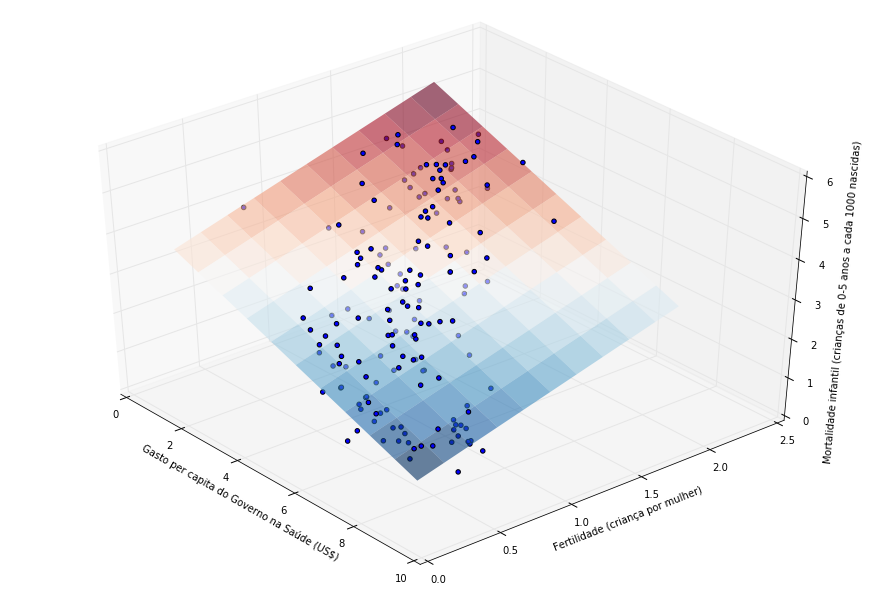

In [17]:
model = sm.ols(formula='mortalidade_infantil_2010 ~ gastos_governo_2010 + fertilidade_2010', data = dados)
fit = model.fit()

from mpl_toolkits.mplot3d import Axes3D

X = dados[['gastos_governo_2010', 'fertilidade_2010']]
y = dados['mortalidade_infantil_2010']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.gastos_governo_2010.min(), X.gastos_governo_2010.max(), 100), 
                       np.linspace(X.fertilidade_2010.min(), X.fertilidade_2010.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-40, elev=40)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].gastos_governo_2010, X[resid >= 0].fertilidade_2010, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].gastos_governo_2010, X[resid < 0].fertilidade_2010, y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel('Gasto per capita do Governo na Saúde (US$)')
ax.set_ylabel('Fertilidade (criança por mulher)')
ax.set_zlabel('Mortalidade infantil (crianças de 0-5 anos a cada 1000 nascidas)')

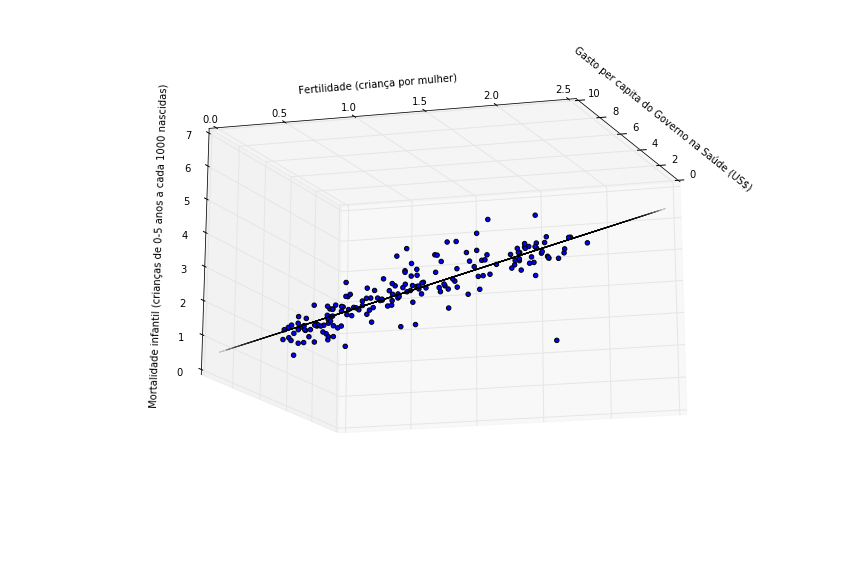

In [18]:
Image("3d_3.png")

## Removendo valores aberrantes

In [19]:
dados = dados.drop(dados.index[[0, 51, 71]])
dados.shape

(173, 3)

## Modelo ajustado (sem valores aberrantes)

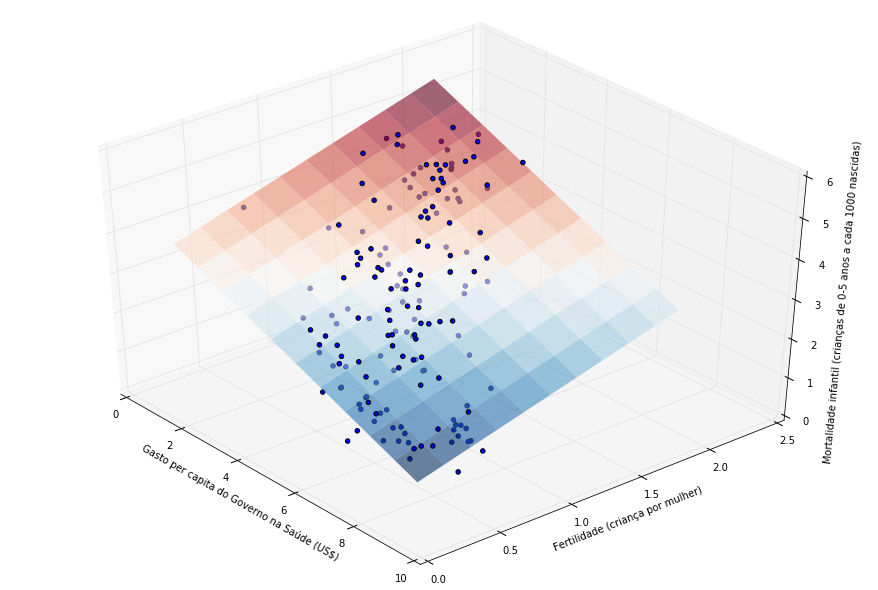

In [20]:
model = sm.ols(formula='mortalidade_infantil_2010 ~ gastos_governo_2010 + fertilidade_2010', data = dados)
fit = model.fit()

from mpl_toolkits.mplot3d import Axes3D

X = dados[['gastos_governo_2010', 'fertilidade_2010']]
y = dados['mortalidade_infantil_2010']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.gastos_governo_2010.min(), X.gastos_governo_2010.max(), 100), 
                       np.linspace(X.fertilidade_2010.min(), X.fertilidade_2010.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-40, elev=40)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].gastos_governo_2010, X[resid >= 0].fertilidade_2010, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].gastos_governo_2010, X[resid < 0].fertilidade_2010, y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel('Gasto per capita do Governo na Saúde (US$)')
ax.set_ylabel('Fertilidade (criança por mulher)')
ax.set_zlabel('Mortalidade infantil (crianças de 0-5 anos a cada 1000 nascidas)')

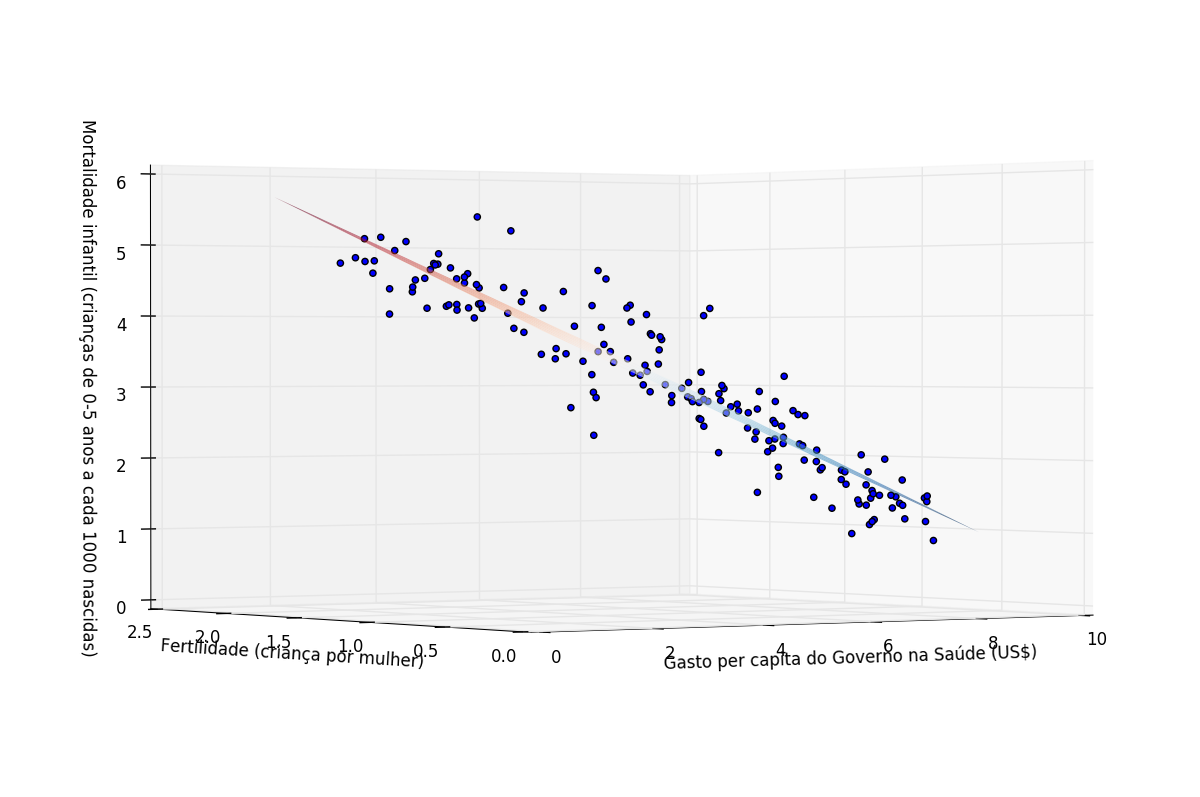

In [21]:
Image("3d_4.png")

## Teste de hipótese

In [22]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     mortalidade_infantil_2010   R-squared:                       0.871
Model:                                   OLS   Adj. R-squared:                  0.869
Method:                        Least Squares   F-statistic:                     572.3
Date:                       Tue, 06 Dec 2016   Prob (F-statistic):           3.10e-76
Time:                               17:45:26   Log-Likelihood:                -90.296
No. Observations:                        173   AIC:                             186.6
Df Residuals:                            170   BIC:                             196.1
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               3.7992      0.204     18.668      0.000         3.397     4.201
gastos_governo_2010    -0.3404      0.024    -13.925      0.000        -0.389    -0.292
fertilidade_2010        1.0376      0.097     10.644      0.000         0.845     1.230
==============================================================================
Omnibus:                       13.453   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.053
Skew:                           0.518   Prob(JB):                     0.000198
Kurtosis:                       4.137   Cond. No.                         39.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Pela tabela acima podemos observar que o valor-p dos testes de hipóteses das duas variáveis é zero. Assim, não há evidências para não rejeitar-se as hipóteses nulas (B1 = 0 e B2 = 0). Isso significa que existem relações entre as variáveis explicativas e a variável resposta, ou seja, tanto "Fertilidade" como "Gastos per capita com saúde" são relevantes para o modelo.

## Análise do Modelo

##### Adequação das suposições do modelo e qualidade do ajuste

In [23]:
# Análise de resíduos
E1 = []
B1 = -0.3185
B0 = 3.6425
for i in range(0,173):
    E1.append(dados.mortalidade_infantil_2010[i] - (dados.gastos_governo_2010[i]*B1 + B0))

B2 = 1.0711
E2 = []
for i in range(0,173):
    E2.append(dados.mortalidade_infantil_2010[i] - (dados.fertilidade_2010[i]*B2 + B0))

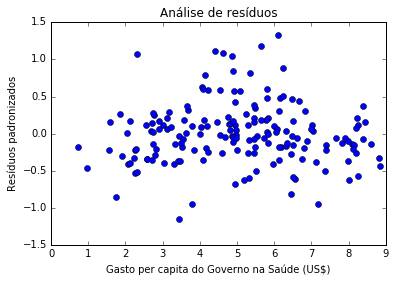

In [25]:
%matplotlib inline
plt.plot(dados.gastos_governo_2010, fit.resid, 'o')
plt.xlabel("Gasto per capita do Governo na Saúde (US$)")
plt.ylabel('Resíduos padronizados')
plt.title("Análise de resíduos")
plt.show()

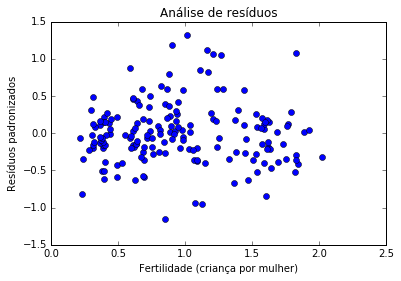

In [26]:
%matplotlib inline
plt.plot(dados.fertilidade_2010, fit.resid, 'o')
plt.xlabel("Fertilidade (criança por mulher)")
plt.ylabel('Resíduos padronizados')
plt.title("Análise de resíduos")
plt.show()

Analisando graficamente percebe-se uma taxa de variação próxima à zero aos resíduos em ambos os gráficos residuais, demonstrando uma relação de independência e uma pequena flutuação, com os erros variando de -1,5 até 1,5, o que demonstra uma boa qualidade do ajuste de nossa suposição.

##### Interpretação dos Parâmetros

B1:Considerando que ambas as variáveis explicativas e a resposta foram linearizadas por ln, a cada aumento de 1% "Gasto per capita do governo na saúde" a variação prevista de "mortalidade infantil" é de -0.3404%.

B2:Considerando que ambas as variáveis explicativas e a resposta foram linearizadas por ln, a cada 1% de aumento na "Fertilidade" a variação média de "mortalidade infantil" é de 1.0376%.

##### Objetivos

Há diversos fatores que podem afetar e explicar a taxa de mortalidade de um país. O quanto um governo investe no setor saúde é certamente um fator que influência a qualidade de vida de sua população e, consequantemente, pode nos dizer muito sobre o número de crianças que morre anualmente.

Enquanto a primeira variável expressa uma responsabilidade do governo de um país, já que o quanto de dinheiro público é investido em saúde é uma decisão do Estado, a nossa segunda variável expressa o contexto social de uma nação e, dessa forma, representa a influência direta de uma população na taxa de mortalidade infantil de seu país. Assim, a escolha da taxa de fertilidade de mulheres como uma variável explicativa foi motivada pelo interesse de se verificar a influência direta que a população de um país tem sob a variável resposta.

Com um modelo de regressão, é possível quantificar a influência das variáveis explicativas sobre a variável resposta e, dessa forma, fazer previsões sobre a mortalidade infantil de um país qualquer.

##### Modelo Global x Modelo Local

Avaliaremos se o modelo de regressão também é valido quando os países são divididos em subgrupos. Para a divisão, utilizaremos a variável PIB per capita.

In [ ]:
dados_pib_capita = pd.read_excel("GDPpercapitaconstant2000US.xlsx", index_col = 0)
pib_capita = dados_pib_capita.iloc[:,50:51]
pib_capita.head()

In [ ]:
dados = dados.join(pib_capita, how='outer')

In [ ]:
dados = dados[~np.isnan(dados.pib_capita_2010)]
dados = dados[~np.isnan(dados.mortalidade_infantil_2010)]
dados = dados[~np.isnan(dados.gastos_governo_2010)]
dados = dados[~np.isnan(dados.fertilidade_2010)]
dados.head()

In [ ]:
dados.shape

O valor mediano do PIB per capita é aproximadamente 2500 dólares. Ou seja, esse valor divide os países ao meio, o que nos beneficia em nossa análise, já que os dois subgrupos terão aproximadamente o mesmo número de dados.

##### Países de PIB per capita abaixo de US$ 2500

In [ ]:
dados1 = dados[dados.pib_capita_2010 <= 2500]
dados1.head()

##### Países de PIB per capita abaixo de US$ 2500

In [ ]:
dados2 = dados[dados.pib_capita_2010 > 2500]
dados2.head()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X = dados[['gastos_governo_2010', 'fertilidade_2010']]
y = dados['mortalidade_infantil_2010']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.gastos_governo_2010.min(), X.gastos_governo_2010.max(), 100), 
                       np.linspace(X.fertilidade_2010.min(), X.fertilidade_2010.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-40, elev=40)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(dados1.gastos_governo_2010, dados1.fertilidade_2010, dados1.mortalidade_infantil_2010, color='black', alpha=1.0, facecolor='white', c='r')
ax.scatter(dados2.gastos_governo_2010, dados2.fertilidade_2010, dados2.mortalidade_infantil_2010, color='black', alpha=1.0, c='g')

ax.set_xlabel('Gasto per capita do Governo na Saúde (US$)')
ax.set_ylabel('Fertilidade (criança por mulher)')
ax.set_zlabel('Mortalidade infantil (crianças de 0-5 anos a cada 1000 nascidas)')

In [ ]:
Image("3d2_1.png")

A partir dos novos gráficos obtidos, podemos observar a divisão dos países em dois subgrupos de tamanhos aproximadamente iguais. Tanto os países de PIB per capita superior a US$ 2500 como os de inferior aparentam se "encaixar" bem ao modelo global, já que os dois subgrupos são muito bem representados pelo plano da Regressão Linear. Dessa forma, podemos afirmar que o modelo global pode ser utilizado também como modelo local, quando os países são divididos através da variável PIB per capita.

## Conclusão

Pelos resultados inferenciais observados, podemos concluir que as duas variáveis explicativas possuem uma forte relação com a variável resposta, como era esperado. Ou seja, tanto a taxa de fertilidade como o gasto per capita com saúde possuem uma forte influência na taxa de mortalidade infantil de um país e, dessa forma, podem explicar os valores dessa variável. A partir do modelo obtido, fica bem simples de se fazer uma suposição sobre a variável resposta para qualquer país: para isso, basta conhecer os valores das duas outras variáveis. Também fica aparente que, com uma taxa de variação maior, o índice de fertilidade afeta o índice de mortalidade infantil por 1% mais do que uma mudança de 1% no gasto do governo na saúde per capita, ou seja, as ações sociais, influenciadas diretamente pelas ações da população afetam mais fortemente a variação da mortalidade infantil do que as ações gerais de investimento do governo. Essa conclusão pode ser útil para futuras estratégias governamentais em busca de ações que melhor impactem na qualidade de vida de sua população.